<a href="https://colab.research.google.com/github/Masteryny/Estadisitca2021/blob/main/PracitcaSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [92]:
datos=pd.read_csv('/content/CSVS/DistrictLevelData_V3.csv')

In [93]:
datos.dtypes

Unnamed: 0                      int64
Day                            object
Weekday                        object
District                       object
DistrictNumber                  int64
Mem                           float64
Abs                           float64
AttendancePercent             float64
AbsentPercent                 float64
County                         object
TEA_Description                object
NCES_Description               object
MetroStatus                    object
CovidTotalCountyCases           int64
CovidCountyPercentIncrease    float64
CovidTotalStateCases            int64
CovidStatePercentIncrease     float64
PRCP                          float64
TMAX                          float64
TMIN                          float64
dtype: object

In [94]:
datos['Fecha_y_Hora']=datos.Day
datos['fecha_hora']=datos.Fecha_y_Hora.map(lambda x:datetime.strptime(x,'%d/%m/%Y'))

In [95]:
datos.index=datos.fecha_hora
datos = datos.loc['2020-09']
datos.head()

,Unnamed: 0,Day,Weekday,District,DistrictNumber,Mem,Abs,AttendancePercent,AbsentPercent,County,TEA_Description,NCES_Description,MetroStatus,CovidTotalCountyCases,CovidCountyPercentIncrease,CovidTotalStateCases,CovidStatePercentIncrease,PRCP,TMAX,TMIN,Fecha_y_Hora,fecha_hora
fecha_hora,,,,,,,,,,,,,,,,,,,,,,
2020-09-01,12,1/09/2020,Tuesday,CONROE ISD,170902,64059.0,1759.0,97.25,2.75,Montgomery,Other Central City,City-Small,Metro,60312,1.130152,645534,0.814753,0.0,100.0,82.0,1/09/2020,2020-09-01
2020-09-02,13,2/09/2020,Wednesday,CONROE ISD,170902,64085.0,1680.0,97.38,2.62,Montgomery,Other Central City,City-Small,Metro,60790,0.792545,649844,0.667664,0.0,100.0,83.0,2/09/2020,2020-09-02
2020-09-03,14,3/09/2020,Thursday,CONROE ISD,170902,64118.0,1859.0,97.10,2.90,Montgomery,Other Central City,City-Small,Metro,61346,0.914624,653321,0.535051,0.0,95.0,80.0,3/09/2020,2020-09-03
2020-09-04,15,4/09/2020,Friday,CONROE ISD,170902,64145.0,1988.0,96.90,3.10,Montgomery,Other Central City,City-Small,Metro,61983,1.038373,658789,0.836955,0.0,91.0,77.0,4/09/2020,2020-09-04
2020-09-08,16,8/09/2020,Tuesday,CONROE ISD,170902,64268.0,1701.0,97.35,2.65,Montgomery,Other Central City,City-Small,Metro,63530,2.495846,670427,1.766575,0.0,96.0,75.0,8/09/2020,2020-09-08


In [96]:
conteo=datos.CovidTotalCountyCases.resample("d").count()
conteo

fecha_hora
2020-09-01     9
2020-09-02     9
2020-09-03     9
2020-09-04     9
2020-09-05     0
2020-09-06     0
2020-09-07     2
2020-09-08    12
2020-09-09    12
2020-09-10    12
2020-09-11    12
2020-09-12     0
2020-09-13     0
2020-09-14    12
2020-09-15    12
2020-09-16    12
2020-09-17    12
2020-09-18    12
2020-09-19     0
2020-09-20     0
2020-09-21    12
2020-09-22    12
2020-09-23    12
2020-09-24    12
2020-09-25    11
2020-09-26     0
2020-09-27     0
2020-09-28    11
2020-09-29    12
2020-09-30    12
Freq: D, Name: CovidTotalCountyCases, dtype: int64

In [97]:
# Valores de Dias de Semana
semana=pd.concat([conteo],axis=1)
semana['dayofweek']=semana.index.dayofweek
semana

lunavier=semana[semana.dayofweek.isin([0,1,2,3,4])].CovidTotalCountyCases
lunavier.head(200)

fecha_hora
2020-09-01     9
2020-09-02     9
2020-09-03     9
2020-09-04     9
2020-09-07     2
2020-09-08    12
2020-09-09    12
2020-09-10    12
2020-09-11    12
2020-09-14    12
2020-09-15    12
2020-09-16    12
2020-09-17    12
2020-09-18    12
2020-09-21    12
2020-09-22    12
2020-09-23    12
2020-09-24    12
2020-09-25    11
2020-09-28    11
2020-09-29    12
2020-09-30    12
Name: CovidTotalCountyCases, dtype: int64

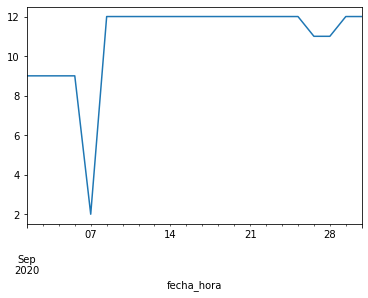

In [109]:
#Grafico de casos Totales de Covid por Estatados
lunavier[0:(7*5)].plot()
plt.show()

In [110]:
x=lunavier
prediccion = SARIMAX(x,order=(1,1,1), seasonal_order=(1,1,1,4))
resultado = prediccion.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [111]:
resultado.aic

93.24392951033283

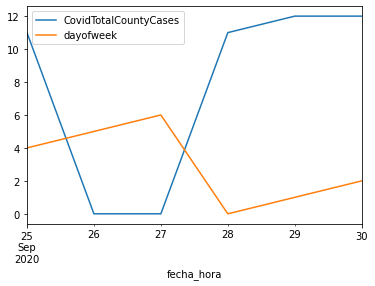

In [140]:
analisis=semana.loc['2020-09-25':'2020-09-30']
analisis.plot()
